# This is a personal project for Udacity Machine Learning Nanodegree program. In this project, we implemented SVM,GNB, DT to predict the Alzhieimer Disease. The data is obtained from Open Access Series of Imaging Studies (OASIS). 

In [178]:
# Import libraries
import numpy as np
import pandas as pd
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv('oasis_cross-sectional.csv')
print("The data has {} samples and {} features".format(*data.shape))

The data has 436 samples and 12 features


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,NaN,NaN,NaN,NaN,1367.750000,0.742750,1.111750,NaN
50%,54.000000,NaN,NaN,NaN,NaN,1475.500000,0.809000,1.190000,NaN
75%,74.000000,NaN,NaN,NaN,NaN,1579.250000,0.842000,1.284250,NaN
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


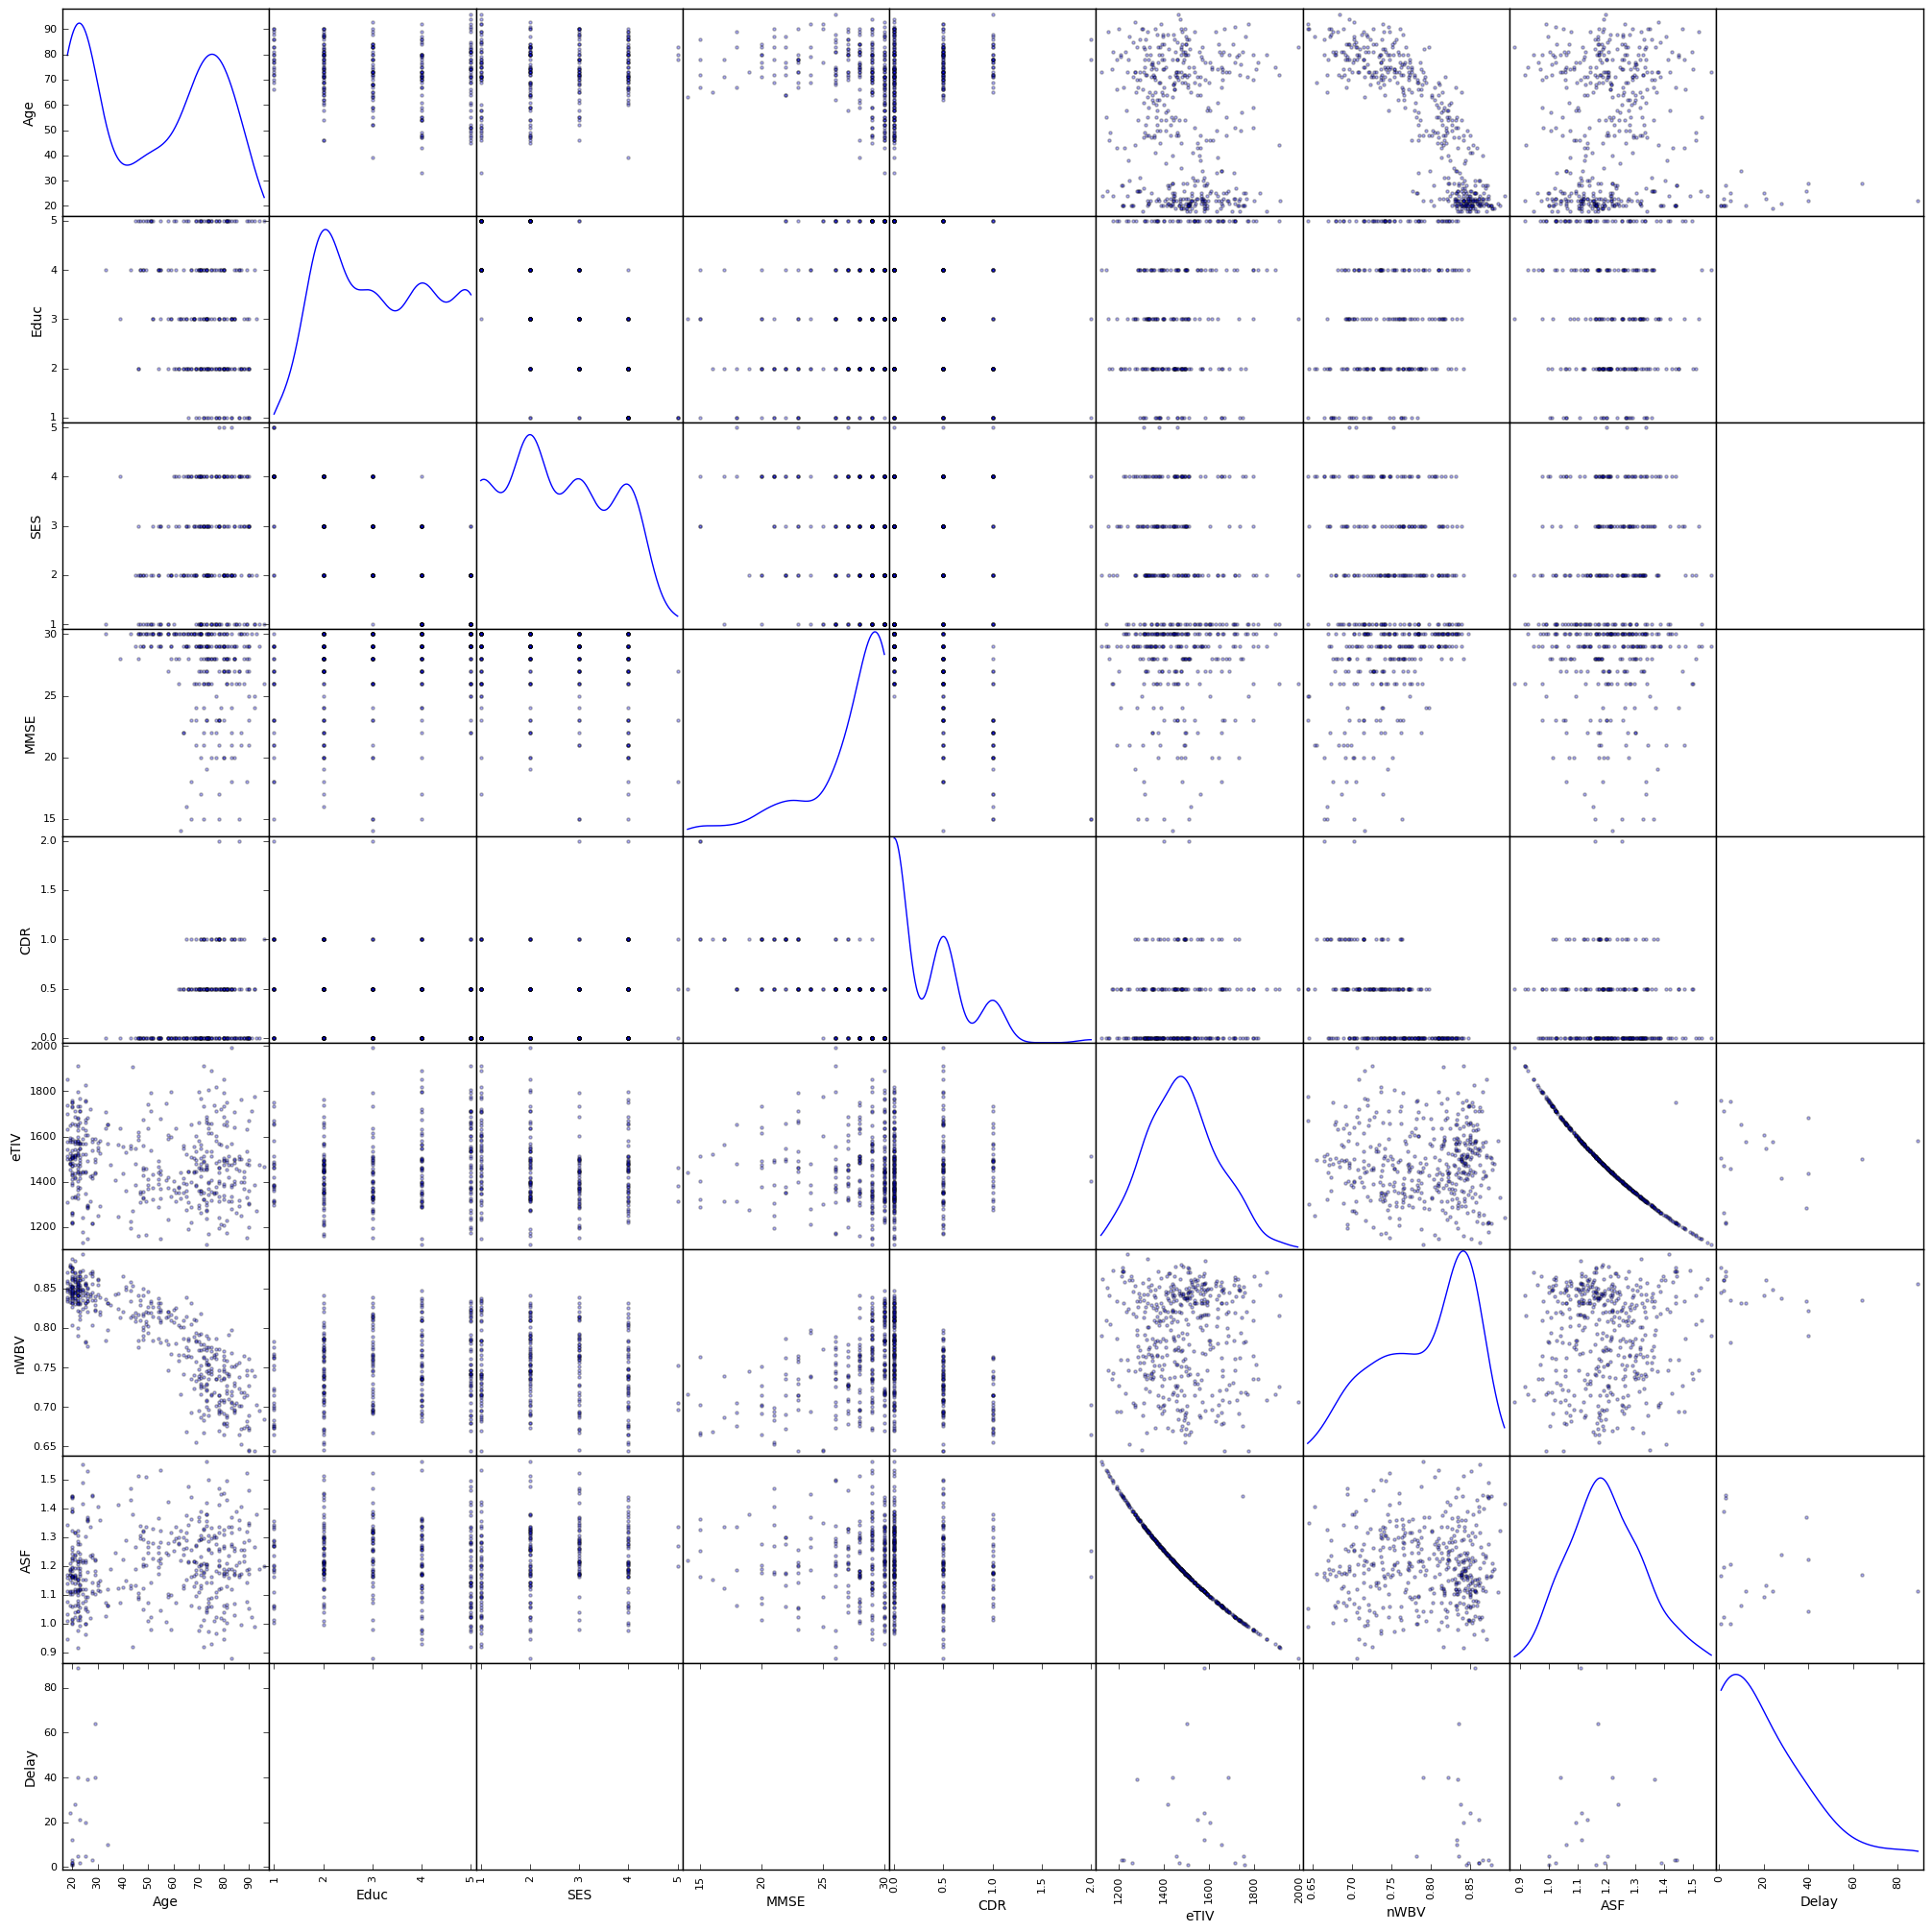

In [179]:
# Display data and a description of the dataset
display(data.describe())
# Visualize the data set
pd.scatter_matrix(data, alpha = 0.3, figsize = (25,25), diagonal = 'kde');

In [180]:
# Test how many columns have null value
data.columns[pd.isnull(data).any()].tolist()

['Educ', 'SES', 'MMSE', 'CDR', 'Delay']

In [181]:
# Assign the data values into a new varaible and drop the features that is not necessary for the project
full_new_data = data.drop(["Delay","Hand","ID"], axis = 1)

In [182]:
# Convert the gender values into binary values. The value 1 represents Female; The value 0 represents Male.
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all F/M values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['F', 'M'], [1, 0])

        # Collect the revised columns
        output = output.join(col_data)
    
    return output

# Call the preprocess function and assigned it to the data set
full_new_data = preprocess_features(full_new_data)

# Print how many features that has been processed
print "Processed feature columns ({} total features):\n{}".format(len(full_new_data.columns), list(full_new_data.columns))

Processed feature columns (9 total features):
['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


In [183]:
# We have many empty NaN values in the dataset. Replace those values with mean value.
full_new_data = full_new_data.where(pd.notnull(full_new_data), full_new_data.mean(), axis='columns')

In [184]:
# Check the result
full_new_data

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,74,2.000000,3.000000,29.00000,0.000000,1344,0.743,1.306
1,1,55,4.000000,1.000000,29.00000,0.000000,1147,0.810,1.531
2,1,73,4.000000,3.000000,27.00000,0.500000,1454,0.708,1.207
3,0,28,3.178723,2.490741,27.06383,0.285106,1588,0.803,1.105
4,0,18,3.178723,2.490741,27.06383,0.285106,1737,0.848,1.010
5,1,24,3.178723,2.490741,27.06383,0.285106,1131,0.862,1.551
6,0,21,3.178723,2.490741,27.06383,0.285106,1516,0.830,1.157
7,1,20,3.178723,2.490741,27.06383,0.285106,1505,0.843,1.166
8,0,74,5.000000,2.000000,30.00000,0.000000,1636,0.689,1.073
9,1,52,3.000000,2.000000,30.00000,0.000000,1321,0.827,1.329


In [185]:
# Round the float value into integer since some of the features do not support float values
full_new_data['SES'] = full_new_data['SES'].round(0)
full_new_data['CDR'] = full_new_data['CDR'].round(1)

In [186]:
# Use python map method to convert the CDR values. If CDR >= 0.5 convert the values to 1. Otherwise, set it to 0
full_new_data['CDR'] = full_new_data['CDR'].map({0.5: 1, 1: 1, 2:1, 0.3:0, 0:0})

In [187]:
# Check the data again.
full_new_data

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,74,2.000000,3.0,29.00000,0,1344,0.743,1.306
1,1,55,4.000000,1.0,29.00000,0,1147,0.810,1.531
2,1,73,4.000000,3.0,27.00000,1,1454,0.708,1.207
3,0,28,3.178723,2.0,27.06383,0,1588,0.803,1.105
4,0,18,3.178723,2.0,27.06383,0,1737,0.848,1.010
5,1,24,3.178723,2.0,27.06383,0,1131,0.862,1.551
6,0,21,3.178723,2.0,27.06383,0,1516,0.830,1.157
7,1,20,3.178723,2.0,27.06383,0,1505,0.843,1.166
8,0,74,5.000000,2.0,30.00000,0,1636,0.689,1.073
9,1,52,3.000000,2.0,30.00000,0,1321,0.827,1.329


In [188]:
# Extract feature columns
feature_cols = list(full_new_data.columns[:-1])

# Extract target column "CDR"
target_col = full_new_data.columns[5] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = full_new_data[feature_cols]
y_all = full_new_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

print "\n Target values:"
print y_all.head()

Feature columns:
['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV']

Target column: CDR

Feature values:
   M/F  Age      Educ  SES      MMSE  CDR  eTIV   nWBV
0    1   74  2.000000  3.0  29.00000    0  1344  0.743
1    1   55  4.000000  1.0  29.00000    0  1147  0.810
2    1   73  4.000000  3.0  27.00000    1  1454  0.708
3    0   28  3.178723  2.0  27.06383    0  1588  0.803
4    0   18  3.178723  2.0  27.06383    0  1737  0.848

 Target values:
0    0
1    0
2    1
3    0
4    0
Name: CDR, dtype: int64


In [193]:
# Import the train test split function from sklearn
from sklearn.cross_validation import train_test_split

# Shuffle and split the dataset into the number of training and testing
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = 0.5)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 218 samples.
Testing set has 218 samples.


In [194]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label= 0)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "\n"

In [195]:
# Import the three supervised learning models and F1 score from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from time import time
from sklearn.metrics import f1_score

# Initialize the three models
clf_A = GaussianNB()
clf_B = tree.DecisionTreeClassifier(max_depth = 1000, min_samples_split = 10, random_state = 42)
clf_C = SVC(C=1000, kernel='rbf', gamma= 1e-4, random_state = 42)


# Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C]:
    for i in [2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200]:
        train_predict(clf, X_train[:i], y_train[:i], X_test, y_test)
    print "\n"

Training a GaussianNB using a training set size of 2. . .
Trained model in 0.0017 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.6883.


Training a GaussianNB using a training set size of 3. . .
Trained model in 0.0006 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.0000.


Training a GaussianNB using a training set size of 4. . .
Trained model in 0.0006 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.0000.


Training a GaussianNB using a training set size of 5. . .
Trained model in 0.0011 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7647.


Training a GaussianNB using a training set size of 6. . .
Trained model in 0.000

In [196]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn import grid_search
from sklearn.metrics import make_scorer

# Create the parameters list that need to tune
parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
#parameters = {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

# Initialize the classifier
clf = SVC()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label= 1)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters, f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0006 seconds.
Tuned model has a training F1 score of 1.0000.
Made predictions in 0.0006 seconds.
Tuned model has a testing F1 score of 0.9501.
